## Assignment 2
### Name: Kshitij Mohan Kadam
### Roll NO: 43133
### Batch:Q9

### 1. import the necessary packages

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse


### 2. Grab the MNIST dataset 

In [2]:
print("Accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# each image in the MNIST dataset is represented as a 28x28x1 image, but in order to apply a standard neural network we must first "flatten" the image to be simple list of 28x28=784 pixels

trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# convert the labels from integers to vectors
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)

Accessing MNIST...
11490434/11490434 [==============================] - 2s 0us/step


### 3. Feed forward Neural Network

In [3]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

### 4. Adding SGD optimizer and training

In [4]:
# Adding optimizer
sgd = SGD(0.01) ## Learning rate is 0.01

# Fitting and training
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 2.2791 - accuracy: 0.2101 - val_loss: 2.2362 - val_accuracy: 0.3030
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 2.2044 - accuracy: 0.4024 - val_loss: 2.1632 - val_accuracy: 0.5345
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 2.1193 - accuracy: 0.5469 - val_loss: 2.0606 - val_accuracy: 0.5695
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 1.9964 - accuracy: 0.6203 - val_loss: 1.9096 - val_accuracy: 0.6293
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 1.8209 - accuracy: 0.6487 - val_loss: 1.7045 - val_accuracy: 0.6618
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 1.6029 - accuracy: 0.6745 - val_loss: 1.4752 - val_accuracy: 0.6990
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 1.3830 - accuracy: 0.7016 - val_loss: 1.2663 - val_accuracy: 0.7244

Epoch 58/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.9096 - val_loss: 0.3047 - val_accuracy: 0.9136
Epoch 59/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3134 - accuracy: 0.9097 - val_loss: 0.3030 - val_accuracy: 0.9135
Epoch 60/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3119 - accuracy: 0.9103 - val_loss: 0.3019 - val_accuracy: 0.9133
Epoch 61/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.9107 - val_loss: 0.3005 - val_accuracy: 0.9145
Epoch 62/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3088 - accuracy: 0.9110 - val_loss: 0.2990 - val_accuracy: 0.9144
Epoch 63/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3073 - accuracy: 0.9115 - val_loss: 0.2974 - val_accuracy: 0.9149
Epoch 64/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.9117 - val_loss: 0.2959 - val_accuracy:

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
None


### 5. Evaluating the model

In [6]:
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in le.classes_]))

79/79 [==============================] - 0s 2ms/step
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       980
          1       0.97      0.98      0.97      1135
          2       0.92      0.91      0.91      1032
          3       0.91      0.91      0.91      1010
          4       0.92      0.94      0.93       982
          5       0.91      0.86      0.89       892
          6       0.93      0.95      0.94       958
          7       0.93      0.93      0.93      1028
          8       0.90      0.89      0.90       974
          9       0.92      0.90      0.91      1009

avg / total       0.93      0.93      0.93     10000



### 6. Plotting training loss and accuracy

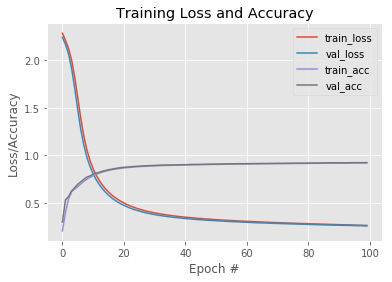

In [7]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()